# HW4

### Logistic regression

### EM algorithm

In [25]:
from GaussDataGenerator import GaussianDataGenerator
from matplotlib import pyplot as plt
import math
import numpy as np

### Logistic regression

- INPUT
    - number of data points, $n$
    - mean, variance of x1, $m_{x1}, v_{x1}$
    - mean, variance of y1, $m_{y1}, v_{y1}$
    - mean, variance of x2, $m_{x2}, v_{x2}$
    - mean, variance of y2, $m_{y2}, v_{y2}$
- FUNCTION
    - Generate $n$ data points to be D1 and D2 through Gaussian Data Generator
        - D1 (x,y) are generated by $N(m_{x1}, v_{x1}), N(m_{y1}, v_{y1})$
        - D2 (x,y) are generated by $N(m_{x2}, v_{x2}), N(m_{y2}, v_{y2})$
    - Use Logistic regression to separate D1 and D2
        - should implement Newton's and steepest gradient descent method during optimization
        - stop when determine convergence
- OUTPUT
    - confusion matrix
    - sensitivity
    - specificity
    
#### Steepest Gradient Descent

$$ \\
W_{n+1} = W_n + \bigtriangledown_{w}J = W_n + \frac{\partial J}{\partial W} \\
\bigtriangledown_{w}J = X^T[y_i - \frac{1}{1+e^{X_iW}}] \\
= X^T \begin{bmatrix} y_1 - \frac{1}{1+e^{X_1W}} \\ y_2 - \frac{1}{1+e^{X_2W}} \\ \vdots \\ y_n - \frac{1}{1+e^{X_nW}} \end{bmatrix} \\
X_i = [\phi_1(x_i), \phi_2(x_i), ..., \phi_D(x_i)]
$$

In [55]:
def generateDataSet(n, mx, vx, my, vy, target=0):
    genX = GaussianDataGenerator(mx, vx)
    genY = GaussianDataGenerator(my, vy)
    return np.array([[next(genX), next(genY)] for _ in range(n)]), np.array([target for _ in range(n)])

def convertFeature(xv):
    #xv = np.array(xv)
    return np.append([1] ,xv)

In [94]:
# some parameter
n = 100

mx1 = 8
vx1 = 1
my1 = 6
vy1 = 1

mx2 = 2
vx2 = 1
my2 = 3
vy2 = 1

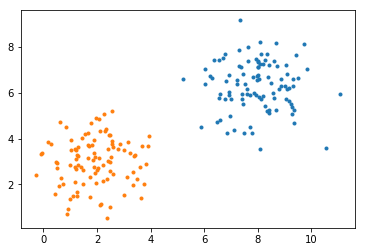

In [95]:
# generate D1 and D2 , also plot them

D1_input, D1_target = generateDataSet(n, mx1, vx1, my1, vy1, 0)
D2_input, D2_target = generateDataSet(n, mx2, vx2, my2, vy2, 1)


train_input = np.append(D1_input, D2_input, axis=0)
train_target = np.append(D1_target, D2_target, axis=0)

plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2")
plt.show()

In [195]:
# initial parameter
X = np.array([convertFeature(xv) for xv in train_input])
w = np.array([0 for _ in range(3)], dtype='float64')

In [307]:
gradient = np.matmul(X.T , train_target -  1/(1 + np.exp(-1 * np.matmul(X, w))) )
print('gradient  \t' + str(gradient))
print('orig  of w\t' + str(w))
w += gradient
print('after of w\t' + str(w))

gradient  	[-0.00034352 -0.001788   -0.00226536]
orig  of w	[ 645.58913605 -191.85651502   52.32004818]
after of w	[ 645.58879253 -191.85830302   52.31778282]


/home/grass0756110/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


[ 645.58879253 -191.85830302   52.31778282]


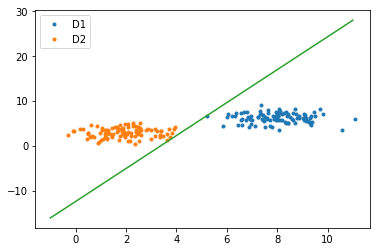

In [308]:
x = np.linspace(-1,11, 1000)
y = [-1*((i*w[1] + w[0])/w[2]) for i in x]
print(w)
plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2")
plt.plot(x,y)
plt.legend()
plt.show()